# EDA (Edatory Data Analysis)

### El análisis exploratorio de datos se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.

Ya estamos casi listos para empezar a analizar los datos. Primero vamos a convertir algunas columnas a números enteros.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(color_codes=True)
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import folium
import ee
import geemap.foliumap as geemap
color = sns.color_palette("tab10")

In [2]:
df_ardilla = pd.read_csv('../ardillas/data/ardillas.csv')
df_ardilla.head(10)

long        lat unique_squirrel_id hectare shift        date   
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  2018-10-14  \
1 -73.957044  40.794851     37E-PM-1006-03     37E    PM  2018-10-06   
2 -73.976831  40.766718      2E-AM-1010-03     02E    AM  2018-10-10   
3 -73.975725  40.769703      5D-PM-1018-05     05D    PM  2018-10-18   
4 -73.959313  40.797533     39B-AM-1018-01     39B    AM  2018-10-18   
5 -73.956570  40.790256     33H-AM-1019-02     33H    AM  2018-10-19   
6 -73.971974  40.769305      6G-PM-1020-02     06G    PM  2018-10-20   
7 -73.960261  40.794288     35C-PM-1013-03     35C    PM  2018-10-13   
8 -73.977072  40.772975      7B-AM-1008-09     07B    AM  2018-10-08   
9 -73.959641  40.790313     32E-PM-1017-14     32E    PM  2018-10-17   

   hectare_squirrel_number       age primary_fur_color highlight_fur_color   
0                        3     Adult           Distint             Distint  \
1                        3     Adult              Gray            Cinnamon   
2                        3     Adult          Cinnamon             Distint   
3                        5  Juvenile              Gray             Distint   
4                        1     Adult           Distint             Distint   
5                        2  Juvenile              Gray            Cinnamon   
6                        2     Adult              Gray             Distint   
7                        3     Adult              Gray            Cinnamon   
8                        9     Adult              Gray             Distint   
9                       14     Adult              Gray             Distint   

   ... tail_twitches approaches indifferent  runs_from  other_interactions   
0  ...         False      False       False      False     No Interactions  \
1  ...         False      False       False       True                  me   
2  ...         False      False        True      False     No Interactions   
3  ...         False      False       False       True     No Interactions   
4  ...         False      False       False      False     No Interactions   
5  ...         False      False       False      False     No Interactions   
6  ...         False      False        True      False     No Interactions   
7  ...         False      False       False       True     No Interactions   
8  ...         False      False        True      False     No Interactions   
9  ...         False      False       False       True     No Interactions   

                                       lat_long  community_districts   
0    POINT (-73.9561344937861 40.7940823884086)                   19  \
1  POINT (-73.9570437717691 40.794850940803904)                   19   
2   POINT (-73.9768311751004 40.76671780725581)                   19   
3    POINT (-73.9757249834141 40.7697032606755)                   19   
4     POINT (-73.9593126695714 40.797533370163)                   19   
5    POINT (-73.9565700386162 40.7902561000937)                   19   
6    POINT (-73.9719735582476 40.7693045133578)                   19   
7   POINT (-73.9602609920814 40.79428830455661)                   19   
8    POINT (-73.9770718586754 40.7729752391435)                   19   
9    POINT (-73.9596413903948 40.7903128889029)                   19   

   borough_boundaries city_council_districts  police_precincts  
0                   4                     19                13  
1                   4                     19                13  
2                   4                     19                13  
3                   4                     19                13  
4                   4                     19                13  
5                   4                     19                13  
6                   4                     19                13  
7                   4                     19                13  
8                   4                     19                13  
9                   4                     19          

In [3]:
df_ardilla[['running', 'chasing','climbing', 'eating', 'foraging']] = df_ardilla[['running', 'chasing','climbing', 'eating', 'foraging']].astype(int)

In [4]:
df_ardilla[['kuks', 'quaas','moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent','runs_from']] = df_ardilla[['kuks', 'quaas',
       'moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent',
       'runs_from']].astype(int)

In [5]:
x = folium.Map(location=[40.794082, -73.956134], zoom_start=15)

for i in range(len(df_ardilla)):
    folium.CircleMarker(
    location=[df_ardilla.iloc[i,1],df_ardilla.iloc[i,0]],
    radius=3,
    color= 'Purple',    
    icon=folium.Icon(icon="cloud")).add_to(x)
    
x

Como se puede ver, prácticamente se vieron por todas partes salvo lógicamente los lagos. Si ampliamos el mapa, veremos que el resto de zonas sin avistamientos corresponden a campos de beisbol ó pistas de tenis.

# Edad de las ardillas

Veamos ahora en un gráfico cuantas ardillas avistadas eran adultas y cuántas jóvenes.

Figure 1: La mayoría de los avistamientos las ardillas eran adultas.


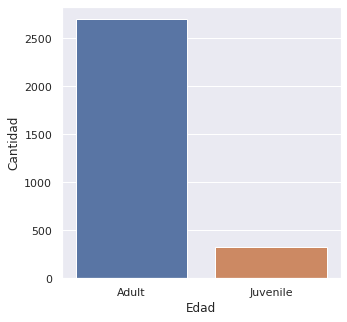

In [6]:
fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df_ardilla, x= 'age')
print('Figure 1: La mayoría de los avistamientos las ardillas eran adultas.')
ax.set_xlabel("Edad")
ax.set_ylabel("Cantidad")
plt.show()


# Colores de las ardillas

¿De qué colores eran las ardillas que se vieron?

Figure 2: La mayoría de las ardillas eran Grises.


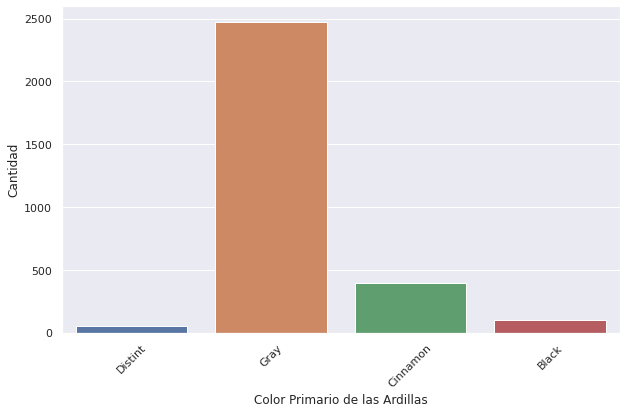

In [7]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df_ardilla, x= 'primary_fur_color')
ax.set_ylabel("Cantidad")
print('Figure 2: La mayoría de las ardillas eran Grises.')
ax.set_xlabel("Color Primario de las Ardillas")
plt.xticks(rotation = 45)
plt.show()


# ¿Dónde estaban las ardillas de cada color?

In [8]:
x= folium.Map(location=[40.781781, -73.966787], zoom_start=15)

color_map = {"Black":"black", "Cinnamon": "red", "Gray": "gray", "Distint": "purple"}

for i in range(len(df_ardilla)):
    folium.CircleMarker(
    location=[df_ardilla.iloc[i,1],df_ardilla.iloc[i,0]],
    radius=3,
    color = color_map[df_ardilla.loc[i,'primary_fur_color']],
    icon=folium.Icon(icon="cloud")).add_to(x)
  
x

# Colores "Highlight" 

Analicemos qué cantidad de ardillas tenian cada posible "Highlight color"

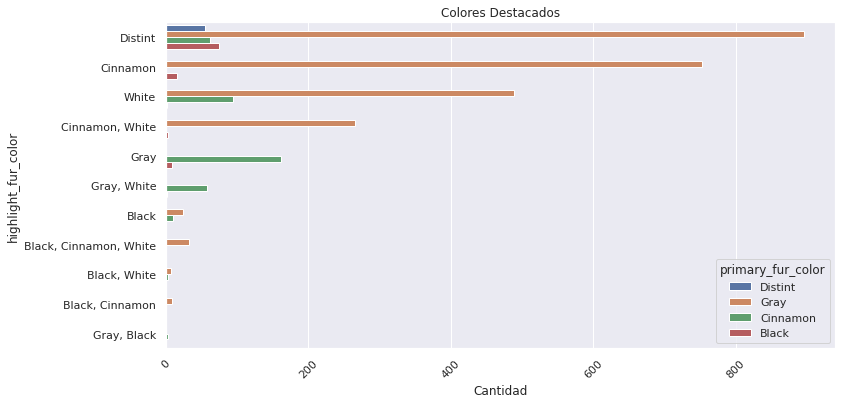

In [21]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(data=df_ardilla, y= 'highlight_fur_color', hue = 'primary_fur_color', order = df_ardilla['highlight_fur_color'].value_counts().index)
ax.set_title("Colores Destacados")
ax.set_xlabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()

# ¿Qué combinación de colores es más probable ver?

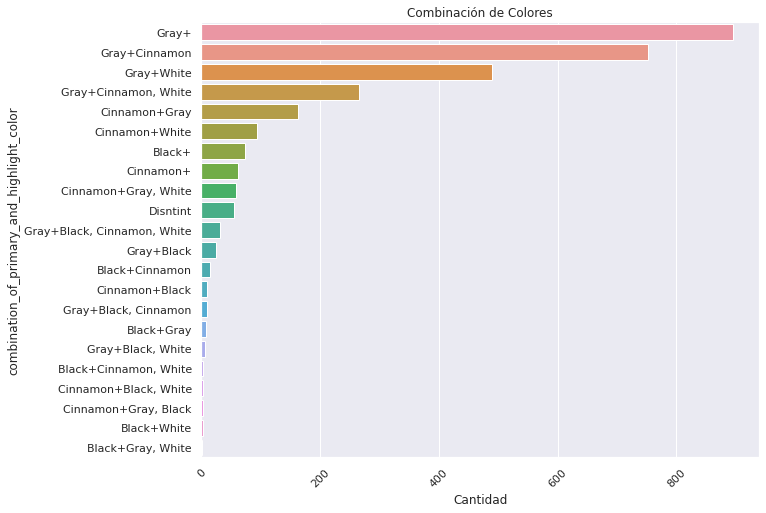

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(data=df_ardilla, y= 'combination_of_primary_and_highlight_color',
             order = df_ardilla['combination_of_primary_and_highlight_color'].value_counts().index)
ax.set_title("Combinación de Colores")
ax.set_xlabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()

In [14]:
df_cola = df_ardilla.rename({'tail_twitches':'Cola_contraida' ,'tail_flags': 'Cola_estirada'}, axis=1)
df_cola.head()

long        lat unique_squirrel_id hectare shift        date   
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  2018-10-14  \
1 -73.957044  40.794851     37E-PM-1006-03     37E    PM  2018-10-06   
2 -73.976831  40.766718      2E-AM-1010-03     02E    AM  2018-10-10   
3 -73.975725  40.769703      5D-PM-1018-05     05D    PM  2018-10-18   
4 -73.959313  40.797533     39B-AM-1018-01     39B    AM  2018-10-18   

   hectare_squirrel_number       age primary_fur_color highlight_fur_color   
0                        3     Adult           Distint             Distint  \
1                        3     Adult              Gray            Cinnamon   
2                        3     Adult          Cinnamon             Distint   
3                        5  Juvenile              Gray             Distint   
4                        1     Adult           Distint             Distint   

   ... Cola_contraida approaches indifferent  runs_from  other_interactions   
0  ...              0          0           0          0     No Interactions  \
1  ...              0          0           0          1                  me   
2  ...              0          0           1          0     No Interactions   
3  ...              0          0           0          1     No Interactions   
4  ...              0          0           0          0     No Interactions   

                                       lat_long  community_districts   
0    POINT (-73.9561344937861 40.7940823884086)                   19  \
1  POINT (-73.9570437717691 40.794850940803904)                   19   
2   POINT (-73.9768311751004 40.76671780725581)                   19   
3    POINT (-73.9757249834141 40.7697032606755)                   19   
4     POINT (-73.9593126695714 40.797533370163)                   19   

   borough_boundaries city_council_districts  police_precincts  
0                   4                     19                13  
1                   4                     19                13  
2                   4                     19                13  
3                   4                     19                13  
4                   4                     19                13  

[5 rows x 33 columns]

In [15]:
df_cola = df_cola.groupby('age').agg({'Cola_contraida':'sum','Cola_estirada':'sum'}).apply(lambda x: round(x/x.sum(),2), axis=1)
df_cola.reset_index()

age  Cola_contraida  Cola_estirada
0     Adult            0.73           0.27
1  Juvenile            0.75           0.25

Figure 3: La mayoría de las ardillas tenian la cola contraida.


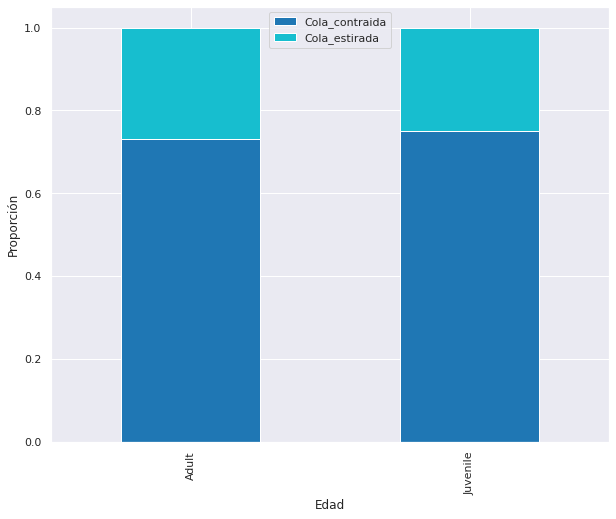

In [22]:
df_cola.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 8));
print('Figure 3: La mayoría de las ardillas tenian la cola contraida.')
plt.legend(loc="upper center")
plt.xlabel("Edad")
plt.ylabel("Proporción")
plt.show()

De la tabla y gráfico anterior, vemos claramente que independientemente de la edad la mayoría de los movimientos de cola son del tipo "cola_contraida".
Con este sistema podemos sacar si las mismas ardillas se ven mas en los arboles o en el suelo

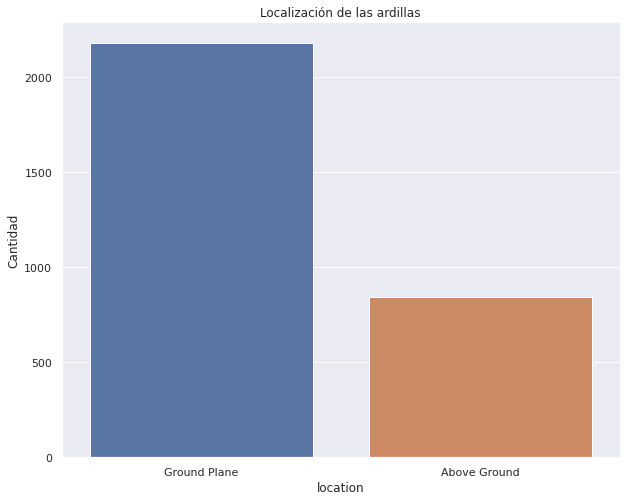

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=df_ardilla, x = 'location')
ax.set_ylabel("Cantidad")
ax.set_title("Localización de las ardillas")
plt.show()

In [48]:
df_loc = df_ardilla.rename({'running':'correr' ,'chasing': 'persiguiendo','climbing': 'escalando','eating':'comiendo','foraging':'rebuscando'}, axis=1)
df_loc.head()

long        lat unique_squirrel_id hectare shift        date   
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  2018-10-14  \
1 -73.957044  40.794851     37E-PM-1006-03     37E    PM  2018-10-06   
2 -73.976831  40.766718      2E-AM-1010-03     02E    AM  2018-10-10   
3 -73.975725  40.769703      5D-PM-1018-05     05D    PM  2018-10-18   
4 -73.959313  40.797533     39B-AM-1018-01     39B    AM  2018-10-18   

   hectare_squirrel_number       age primary_fur_color highlight_fur_color   
0                        3     Adult           Distint             Distint  \
1                        3     Adult              Gray            Cinnamon   
2                        3     Adult          Cinnamon             Distint   
3                        5  Juvenile              Gray             Distint   
4                        1     Adult           Distint             Distint   

   ... tail_twitches approaches indifferent  runs_from  other_interactions   
0  ...             0          0           0          0     No Interactions  \
1  ...             0          0           0          1                  me   
2  ...             0          0           1          0     No Interactions   
3  ...             0          0           0          1     No Interactions   
4  ...             0          0           0          0     No Interactions   

                                       lat_long  community_districts   
0    POINT (-73.9561344937861 40.7940823884086)                   19  \
1  POINT (-73.9570437717691 40.794850940803904)                   19   
2   POINT (-73.9768311751004 40.76671780725581)                   19   
3    POINT (-73.9757249834141 40.7697032606755)                   19   
4     POINT (-73.9593126695714 40.797533370163)                   19   

   borough_boundaries city_council_districts  police_precincts  
0                   4                     19                13  
1                   4                     19                13  
2                   4                     19                13  
3                   4                     19                13  
4                   4                     19                13  

[5 rows x 33 columns]

In [31]:
df_loc = df_loc.groupby('location').agg({'correr':'sum','persiguiendo':'sum','escalando':'sum','comiendo':'sum','rebuscando':'sum'})
df_loc = df_loc.reset_index().melt(id_vars="location").rename(columns=str.title)
df_loc

Location      Variable  Value
0  Above Ground        correr    165
1  Ground Plane        correr    565
2  Above Ground  persiguiendo    101
3  Ground Plane  persiguiendo    178
4  Above Ground     escalando    520
5  Ground Plane     escalando    138
6  Above Ground      comiendo    155
7  Ground Plane      comiendo    605
8  Above Ground    rebuscando    137
9  Ground Plane    rebuscando   1298

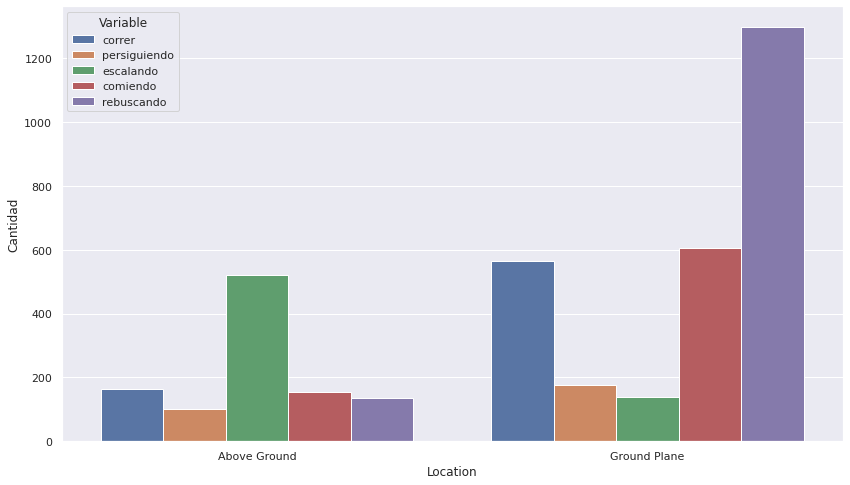

In [36]:
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(data=df_loc, x="Location",y="Value",hue="Variable",ax=ax)
ax.set_ylabel("Cantidad")
plt.show()

Ahora tendremos que determinar la franja horaria de sus actividades

In [52]:
df_loc = df_ardilla.rename({'running':'correr' ,'chasing': 'persiguiendo','climbing': 'escalando','eating':'comiendo','foraging':'rebuscando'}, axis=1)
df_loc.head()

long        lat unique_squirrel_id hectare shift        date   
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  2018-10-14  \
1 -73.957044  40.794851     37E-PM-1006-03     37E    PM  2018-10-06   
2 -73.976831  40.766718      2E-AM-1010-03     02E    AM  2018-10-10   
3 -73.975725  40.769703      5D-PM-1018-05     05D    PM  2018-10-18   
4 -73.959313  40.797533     39B-AM-1018-01     39B    AM  2018-10-18   

   hectare_squirrel_number       age primary_fur_color highlight_fur_color   
0                        3     Adult           Distint             Distint  \
1                        3     Adult              Gray            Cinnamon   
2                        3     Adult          Cinnamon             Distint   
3                        5  Juvenile              Gray             Distint   
4                        1     Adult           Distint             Distint   

   ... tail_twitches approaches indifferent  runs_from  other_interactions   
0  ...             0          0           0          0     No Interactions  \
1  ...             0          0           0          1                  me   
2  ...             0          0           1          0     No Interactions   
3  ...             0          0           0          1     No Interactions   
4  ...             0          0           0          0     No Interactions   

                                       lat_long  community_districts   
0    POINT (-73.9561344937861 40.7940823884086)                   19  \
1  POINT (-73.9570437717691 40.794850940803904)                   19   
2   POINT (-73.9768311751004 40.76671780725581)                   19   
3    POINT (-73.9757249834141 40.7697032606755)                   19   
4     POINT (-73.9593126695714 40.797533370163)                   19   

   borough_boundaries city_council_districts  police_precincts  
0                   4                     19                13  
1                   4                     19                13  
2                   4                     19                13  
3                   4                     19                13  
4                   4                     19                13  

[5 rows x 33 columns]

In [53]:
df_hour = df_loc.groupby('shift').agg({'correr':'sum','persiguiendo':'sum','escalando':'sum','comiendo':'sum','rebuscando':'sum'})
df_hour = df_hour.reset_index().melt(id_vars="shift").rename(columns=str.title)
df_hour

Shift      Variable  Value
0    AM        correr    327
1    PM        correr    403
2    AM  persiguiendo    131
3    PM  persiguiendo    148
4    AM     escalando    340
5    PM     escalando    318
6    AM      comiendo    296
7    PM      comiendo    464
8    AM    rebuscando    601
9    PM    rebuscando    834

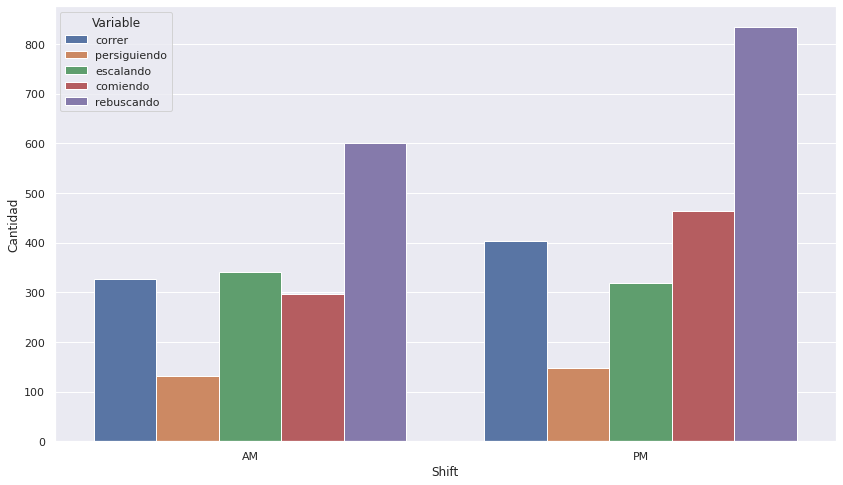

In [55]:
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(data=df_hour, x="Shift",y="Value",hue="Variable",ax=ax)
ax.set_ylabel("Cantidad")
plt.show()

Observando los graficos que hemos expuesto, lo más común es ver que las ardillas estén **rebuscando** y lo menos común es **persiguiendo**, independientemente de la franja horaria, es decir tanto de noche o de día. En cambio el resto de actividades, como  "comer", "escalar"o "correr" sí que se aprecian diferencias en función de la franja horaria. Así, por las mañanas la segunda actividad más frecuente es "escalar" mientras que por las tardes es "comer". Finalmente, la tercera actividad más frecuente es "correr" independientemente de la franja horaria.

In [59]:
m2 = folium.Map(location=[40.781781, -73.966787], zoom_start=14)

for i in range(len(df_ardilla)):
    
    if (df_ardilla.loc[i,"age"]=="Juvenile"):
        radius = 2
    else:
        radius = 4
        
    if (df_ardilla.loc[i,"approaches"]==1):

        folium.CircleMarker(
        location=[df_ardilla.iloc[i,1],df_ardilla.iloc[i,0]],
        radius=radius,
        color = "green",
        icon=folium.Icon(icon="cloud")).add_to(m2)
  
m2